Project Markup

In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
baby_name_original.tail()

,Id,Name,Year,Gender,State,Count
1048570,1048571,Kyrsten,2002,F,FL,6
1048571,1048572,Lacy,2002,F,FL,6
1048572,1048573,Laurie,2002,F,FL,6
1048573,1048574,Lee,2002,F,FL,6
1048574,1048575,Leeanna,2002,F,FL,6


In [4]:
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [5]:
baby_name_original.dtypes

Id                   object
Name                 object
Year                 object
Gender               object
State                object
Count               float64
date_conv    datetime64[ns]
dtype: object

In [6]:
# Females in the Dataset
(baby_name_original.Gender=='F').mean()

0.5961681329423265

In [7]:
# Males in the Dataset
(baby_name_original.Gender=='M').mean()

0.4038318670576735

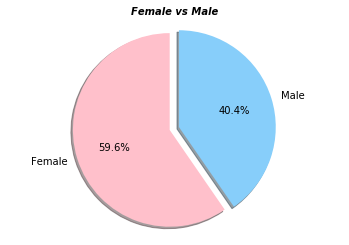

In [8]:
# Plotting Pie-Chart

distribution = baby_name_original.groupby(['Gender'])['Id'].nunique()
gender_demographic = list(distribution.index)
labels = "Female","Male"
colors = "Pink","lightskyblue"
explode = (0,0.1)
plt.pie(distribution,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis("equal")
plt.title("Female vs Male",fontsize=10, fontweight = 'heavy', style= 'italic')
plt.savefig("../Images/Piechartplyplot.png")
plt.show()

In [9]:
# To get the counts

baby_name_original.groupby("Gender").agg({'Count':'sum'})/baby_name_original.Count.sum()

,Count
Gender,
F,0.510717
M,0.489283


In [10]:
# Group the dataset by name
names = baby_name_original.groupby("Name")

In [11]:
# Different names in the database
baby_name_original.Name.nunique()

20652

In [12]:
c = names.count()
c

,Id,Year,Gender,State,Count,date_conv
Name,,,,,,
Aadan,3,3,3,3,3,3
Aaden,34,34,34,34,34,34
Aadhav,1,1,1,1,1,1
Aadhya,9,9,9,9,9,9
Aadi,12,12,12,12,12,12
...,...,...,...,...,...,...
Zylah,4,4,4,4,4,4
Zyler,4,4,4,4,4,4
Zyon,15,15,15,15,15,15


In [13]:
# Name with the most occurances
most_occurances = names.Count.sum().sort_values(ascending=False)
most_occurances

Name
Michael     726834.0
James       693487.0
Robert      676076.0
John        671498.0
David       615056.0
              ...   
Jayren           5.0
Jayvien          5.0
Jazalyn          5.0
Jaziyah          5.0
Kashmere         5.0
Name: Count, Length: 20652, dtype: float64

In [14]:
# Least occurances
least_occurances = (names.Count.sum()== 5).sum()
least_occurances

2975

In [15]:
# Median Name occurance
median_name = names.Count.sum().median()
median_name

46.0

In [16]:
# Median Names
count_name = names.Count.sum()
count_name[count_name==46]

Name
Albertina    46.0
Analuisa     46.0
Aspyn        46.0
Audel        46.0
Bebe         46.0
             ... 
Yahira       46.0
Yamilett     46.0
Yang         46.0
Yanni        46.0
Zoltan       46.0
Name: Count, Length: 66, dtype: float64

In [17]:
# Standard Deviation of Names
names_std = count_name.std()
names_std

18438.14728191366

In [18]:
#Summary on Names
count_name.describe()

count     20652.000000
mean       2637.657757
std       18438.147282
min           5.000000
25%          11.000000
50%          46.000000
75%         287.000000
max      726834.000000
Name: Count, dtype: float64

In [19]:
baby_name_original["Name Length"]= baby_name_original["Name"].str.len()
baby_name_original

,Id,Name,Year,Gender,State,Count,date_conv,Name Length
0,1,Mary,1910,F,AK,14.0,1910-01-01,4
1,2,Annie,1910,F,AK,12.0,1910-01-01,5
2,3,Anna,1910,F,AK,10.0,1910-01-01,4
3,4,Margaret,1910,F,AK,8.0,1910-01-01,8
4,5,Helen,1910,F,AK,7.0,1910-01-01,5
...,...,...,...,...,...,...,...,...
1048570,1048571,Kyrsten,2002,F,FL,6.0,2002-01-01,7
1048571,1048572,Lacy,2002,F,FL,6.0,2002-01-01,4
1048572,1048573,Laurie,2002,F,FL,6.0,2002-01-01,6
1048573,1048574,Lee,2002,F,FL,6.0,2002-01-01,3


In [20]:
#import scipy.stats as sci

In [21]:
baby_name_original['Year'] = baby_name_original['Year'].astype(int)

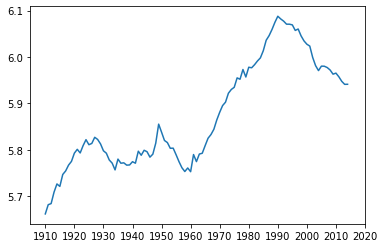

In [32]:
 plt.plot(baby_name_original.groupby(['Year']).agg({'Name Length':np.mean}))

# #Change x ticks using plt.x_ticks([<Give all the labels you want to display>])

years = list(range(1910, 2021,10))
plt.xticks(years)
plt.show()
              

### The average length of baby names has increased over the century , with its peak being in the 90's.
### However , this is the average , we want to know the most popular names length. 

In [ ]:
# Most popular Names Length
popular_name_length = baby_name_original.groupby(['Name','Name Length']).size().reset_index(name="Count").sort_values(by="Count",ascending=False).drop_duplicates("Name", keep="first")
popular_name_length.head(20)


In [ ]:
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

In [ ]:
# Group the dataset by decade
decade = baby_name_new.groupby("Decade")

In [ ]:
# Average per Decade 
average_decade = decade['Name Length'].mean()
average_decade

In [ ]:
# Standard deviation of decade
std_decade= decade['Name Length'].std()
std_decade

In [ ]:
mean_series = baby_name_new.groupby(['Year'])['Name Length'].mean()
max_index = mean_series.argmax()
print("Maximum average value is %f"%mean_series.iloc[max_index])

# Year with maximum average length
print("Year with maximum length is %d"%mean_series.index[max_index])

#Top ten values in 1990
baby_name_new[baby_name_new['Year'] == 1990]

In [ ]:
baby_name_new[baby_name_new['Year'] == 1990].sort_values('Name Length',ascending = False).head(10)[['Name','Name Length']]

In [ ]:
# Distribution of Past 5 years and Next 5 years

In [ ]:
# Total Name counts for each year
total_name = baby_name_new.groupby(["Year"])["Name"].count()
total_name

In [ ]:
# Top 10 Males Name
baby_name_original_male = baby_name_original[baby_name_original["Gender"] == "M"]
baby_name_original_male = baby_name_original[["Name", "Count"]]
baby_name_original_male = baby_name_original.groupby("Name")
baby_name_original_male = baby_name_original.sum()
baby_name_original_male = baby_name_original.sort_values("Count", ascending=False)
baby_name_original_male.head(10)

In [ ]:
# Top 10 Female Names

baby_name_original_female = baby_name_original[baby_name_original["Gender"] == "F"]
baby_name_original_female = baby_name_original[["Name", "Count"]]
baby_name_original_female = baby_name_original.groupby("Name")
baby_name_original_female = baby_name_original.sum()
baby_name_original_female = baby_name_original.sort_values("Count", ascending=False)
baby_name_original_female.head(10)

In [ ]:
# Spike in Name Length.Plot the graph

In [ ]:
# Check the avg of the length of top 50 names
# grouped = baby_name_original.groupby(["Name Length", "Name"])
# grouped.agg(np.mean)

In [ ]:
#Compare 1960-1999 and check the top names. Plot histogram and look at the distribution

In [ ]:
#Length of the name and count of each name length

In [ ]:
#Avg. Female/Male Name Length